Prepare a classification model using Naive Bayes 
for salary data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.model_selection import train_test_split

In [2]:
salary_train=pd.read_csv("C:/Users/HARSHA//Downloads//SalaryData_Train.csv")
salary_test=pd.read_csv("C:/Users/HARSHA/Downloads/SalaryData_Test.csv")

In [3]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


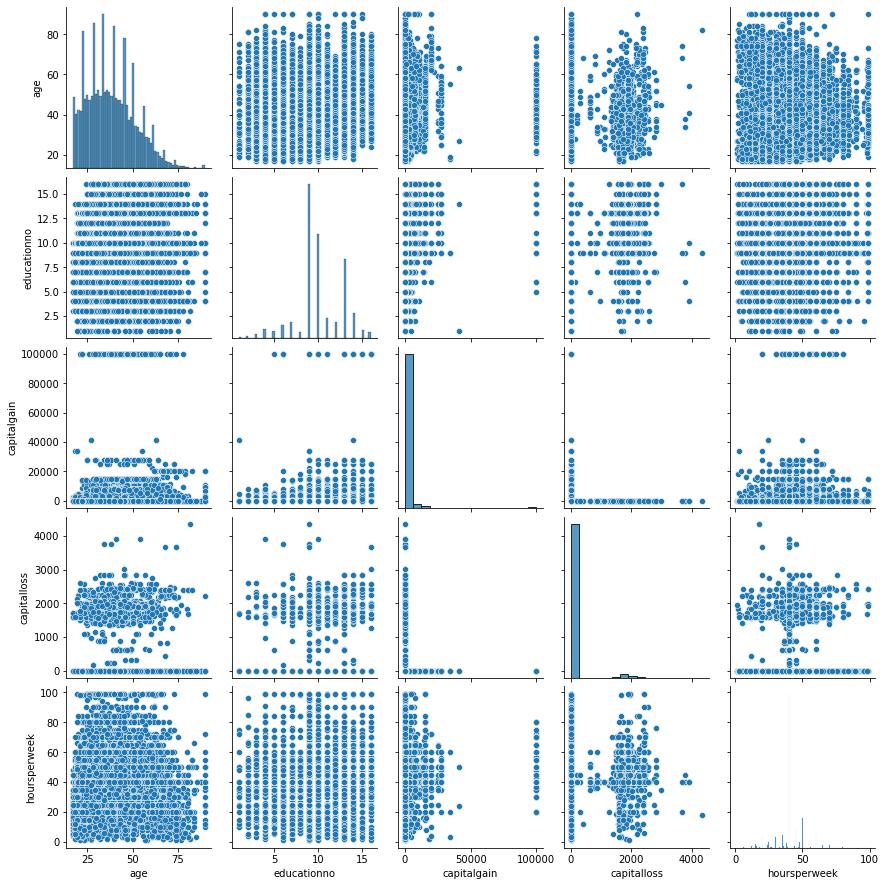

In [5]:
sns.pairplot(salary_train)

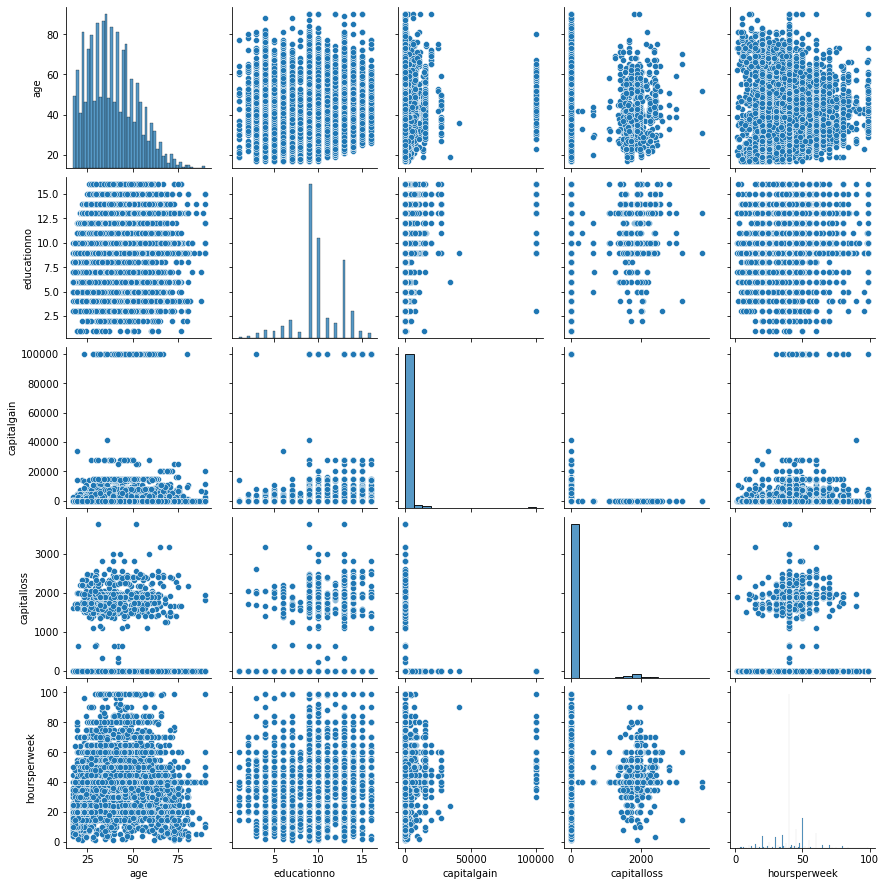

In [6]:
sns.pairplot(salary_test)

In [7]:
string_columns=["workclass","maritalstatus","occupation","relationship","education","race","sex","native"]

In [8]:
le=LabelEncoder()

In [9]:
for i in string_columns:
    salary_train[i]=le.fit_transform(salary_train[i])
    salary_test[i]=le.fit_transform(salary_test[i])

In [10]:
x_train=salary_train.iloc[:,0:12]
y_train=salary_train.iloc[:,13]
x_test=salary_test.iloc[:,0:12]
y_test=salary_test.iloc[:,13]

In [11]:
classifiers_mb=MB()
classifiers_mb.fit(x_train,y_train)
train_pred_mb=classifiers_mb.predict(x_train)
train_accu_mb=np.mean(train_pred_mb==y_train)
pd.crosstab(train_pred_mb,y_train)

Salary,<=50K,>50K
row_0,,
<=50K,21717,5913
>50K,936,1595


In [12]:
test_pred_mb=classifiers_mb.predict(x_test)
test_accu_mb=np.mean(test_pred_mb==y_test)
pd.crosstab(test_pred_mb,y_test)

Salary,<=50K,>50K
row_0,,
<=50K,10891,2920
>50K,469,780


In [13]:
test_pred_mb

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [14]:
test_accu_mb

0.7749667994687915

In [15]:
classifiers_gb=GB()
classifiers_gb.fit(x_train,y_train)
train_pred_gb=classifiers_gb.predict(x_train)
train_accu_gb=np.mean(train_pred_gb==y_train)
pd.crosstab(train_pred_gb,y_train)

Salary,<=50K,>50K
row_0,,
<=50K,21506,5040
>50K,1147,2468


In [16]:
test_pred_gb=classifiers_gb.predict(x_test)
test_accu_gb=np.mean(test_pred_gb==y_test)

In [17]:
test_pred_gb

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [18]:
test_accu_gb

0.7942895086321381